In [106]:
# Importowanie bibliotek

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# Załadowanie przykładowych danych z repozytorium online.

samochody = sns.load_dataset('mpg')

In [108]:
samochody.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [109]:
# Zmieńmy mpg ( czyli żużycie paliwa, mile na galon ), na nasz bardziej europejski l/100km
samochody['mpg'] = samochody['mpg'].apply(lambda x: round(x/2.352146,3))
samochody.rename(columns = {'mpg':'l/100km'}, inplace = True)

In [110]:
samochody.head()

,l/100km,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,7.653,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,6.377,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,7.653,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,6.802,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,7.227,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [111]:
# Podstawowe statystyki 
samochody.dtypes

l/100km         float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [112]:
samochody['origin']=samochody['origin'].astype('string')
samochody['name']=samochody['name'].astype('string')

In [113]:
samochody.dtypes

l/100km         float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           string
name             string
dtype: object

In [114]:
# Dla każdego roku średnie statystyki
srednia_zgrupowana_po_roku = samochody.groupby(by='model_year').mean()

In [115]:
srednia_zgrupowana_po_roku

,l/100km,cylinders,displacement,horsepower,weight,acceleration
model_year,,,,,,
70,7.520621,6.758621,281.413793,147.827586,3372.793103,12.948276
71,9.034357,5.571429,209.750000,107.037037,2995.428571,15.142857
72,7.956286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,7.270050,6.375000,256.875000,130.475000,3419.025000,14.312500
74,9.652333,5.259259,171.740741,94.230769,2877.925926,16.203704
75,8.616200,5.600000,205.533333,101.066667,3176.800000,16.050000
76,9.171941,5.647059,197.794118,101.117647,3078.735294,15.941176
77,9.937679,5.464286,191.392857,105.071429,2997.357143,15.435714
78,10.229417,5.361111,177.805556,99.694444,2861.805556,15.805556


In [116]:
# Średnia dla roku oraz ilości cylindrów
srednia_zgrupowana_po_roku_cylindrach = samochody.groupby(by=['model_year', 'cylinders']).mean()

In [117]:
srednia_zgrupowana_po_roku_cylindrach

l/100km  displacement  horsepower       weight  \
model_year cylinders                                                     
70         4          10.750143    107.000000   87.714286  2292.571429   
           6           8.715500    199.000000   91.750000  2710.500000   
           8           5.999167    367.555556  183.666667  3940.055556   
71         4          11.675077    101.846154   77.583333  2056.384615   
           6           7.652750    243.375000   98.875000  3171.875000   
           8           5.709143    371.714286  166.857143  4537.714286   
72         3           8.078000     70.000000   97.000000  2330.000000   
           4           9.960500    111.535714   85.142857  2382.642857   
           8           5.788538    344.846154  159.692308  4228.384615   
73         3           7.653000     70.000000   90.000000  2124.000000   
           4           9.662364    109.272727   82.909091  2338.090909   
           6           8.077875    212.250000  102.125000  2917.125000   
           8           5.612000    365.250000  170.000000  4279.050000   
74         4          11.819000     96.533333   74.000000  2151.466667   
           6           7.591857    230.428571  101.666667  3320.000000   
           8           6.037000    315.200000  146.000000  4438.400000   
75         4          10.734750    114.833333   84.916667  2489.250000   
           6           7.475500    233.750000   96.750000  3398.333333   
           8           6.660500    330.500000  142.000000  4108.833333   
76         4          11.379800    106.333333   75.600000  2306.600000   
           6           8.502900    221.400000   98.700000  3349.600000   
           8           6.235556    324.000000  146.333333  4064.666667   
77         3           9.141000     80.000000  110.000000  2720.000000   
           4          12.374643    106.500000   78.785714  2205.071429   
           6           8.290200    220.400000  102.000000  3383.000000   
           8           6.802250    335.750000  152.375000  4177.500000   
78         4          12.574294    112.117647   79.705882  2296.764706   
           5           8.630000    131.000000  103.000000  2830.000000   
           6           8.106000    213.250000  109.833333  3314.166667   
           8           8.099000    300.833333  135.500000  3563.333333   
79         4          13.402667    113.583333   75.750000  2357.583333   
           5          10.799000    183.000000   77.000000  3530.000000   
           6           9.757167    205.666667  105.000000  3025.833333   
           8           7.920500    321.400000  131.900000  3862.900000   
80         3          10.076000     70.000000  100.000000  2420.000000   
           4          14.715000    111.000000   74.043478  2360.080000   
           5          15.475000    121.000000   67.000000  2950.000000   
           6          11.011000    196.500000  111.000000  3145.500000   
81         4          13.950810    108.857143   72.950000  2275.476190   
           6           9.960571    184.000000  100.714286  3093.571429   
           8          11.309000    350.000000  105.000000  3725.000000   
82         4          13.634857    118.571429   79.148148  2402.321429   
           6          12.045667    225.000000  102.333333  2931.666667   

                      acceleration  
model_year cylinders                
70         4             16.000000  
           6             15.500000  
           8             11.194444  
71         4             16.961538  
           6             14.750000  
           8             12.214286  
72         3             13.500000  
           4             17.214286  
           8             13.000000  
73         3             13.500000  
           4             17.136364  
           6             15.687500  
           8             12.250000  
74         4             16.400000  
           6             16.857143  
           8             14.700000  
75         4             15

In [118]:
# Waga dla każdego roku
waga = samochody.pivot_table(index = 'model_year', values='weight', aggfunc= 'sum')

In [119]:
waga

,weight
model_year,
70,97811
71,83872
72,90656
73,136761
74,77704
75,95304
76,104677
77,83926
78,103025


In [120]:
# suma koni mechanicznych i wagi po cylindrze
cylinder  = samochody.pivot_table(index = 'cylinders', values=['horsepower', 'weight'], aggfunc= 'sum')

In [121]:
cylinder

,horsepower,weight
cylinders,,
3,397.0,9594
4,15578.0,470858
5,247.0,9310
6,8425.0,268651
8,16305.0,423816


<AxesSubplot:xlabel='origin', ylabel='count'>

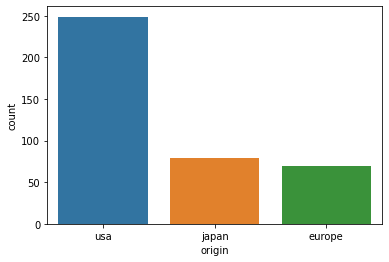

In [122]:
# Ilość samochodów wyprodukowanych w danym kraju
sns.countplot(x = 'origin', data = samochody)

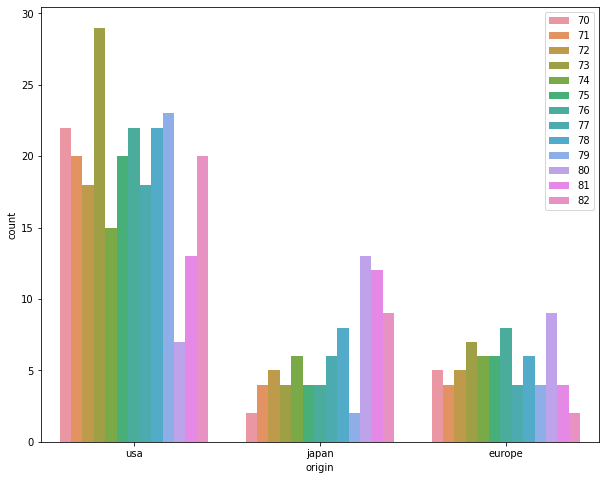

In [123]:
# To samoa, tylko dodatkowo dodajemy legendę po roku
fig = plt.figure(figsize = (10,8))
sns.countplot(x = 'origin', data = samochody, hue = 'model_year')
plt.legend(loc = 'upper right')

<AxesSubplot:xlabel='model_year', ylabel='weight'>

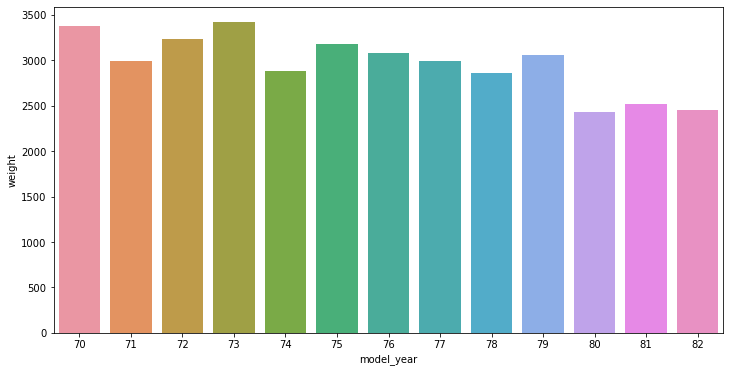

In [124]:
# Wykres pokazuje średnią wagę samochodu w danym roku
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'model_year', y = 'weight', data = samochody, ci = None)

<AxesSubplot:xlabel='model_year', ylabel='horsepower'>

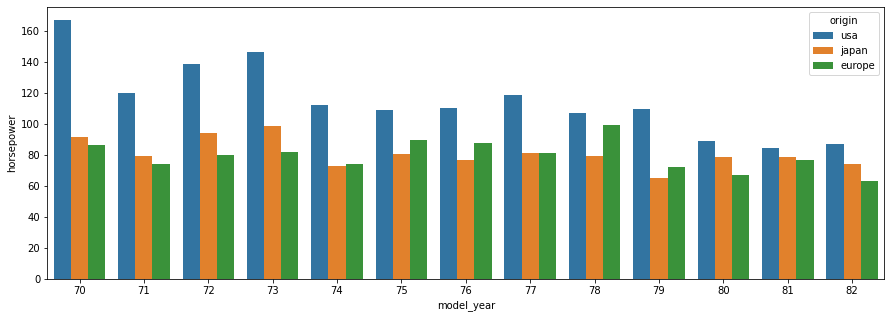

In [125]:
# średnia ilość koni mechanicznych, dla danego roku, dla każdego z krajów pochodzenia
fig = plt.figure(figsize = (15,5))
sns.barplot(x = 'model_year', y = 'horsepower', data = samochody, hue = 'origin', ci = None)

<AxesSubplot:xlabel='model_year', ylabel='cylinders'>

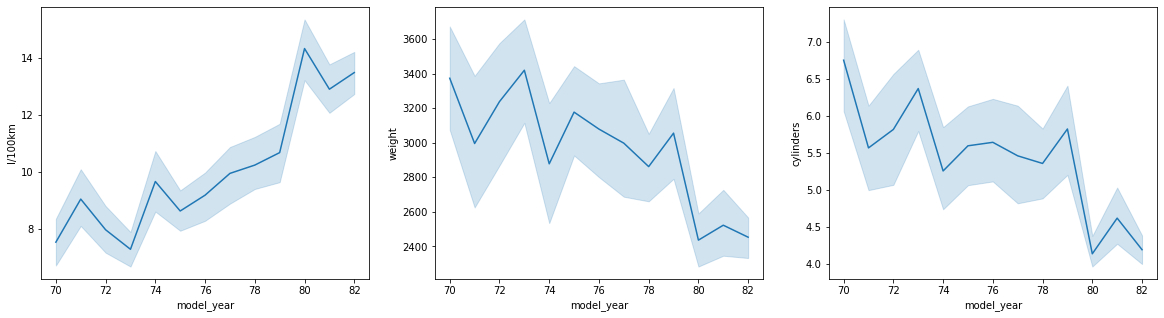

In [126]:
# porównanie 3 wykresów, jak się zmienia spalanie w przeciągu lat, waga od ilośc cylindrów
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,5))
sns.lineplot(x = 'model_year', y = 'l/100km', data = samochody, ax = ax1)
sns.lineplot(x = 'model_year', y ='weight', data = samochody, ax = ax2)
sns.lineplot(x = 'model_year', y ='cylinders', data = samochody, ax = ax3)

In [127]:
# Użytkownik może wprowadzić kolejny wóz 
decyzja = input('Czy chciałbyś dodać kolejny wóz?y/n')
if decyzja == 'y':
    nowa_lista = []
    for i in range(len(samochody.columns)):
        print(samochody.columns[i], ':')
        nowy = input()
        nowa_lista.append(nowy)
    samochody.loc[-1] = nowa_lista
#reset indexu
samochody.reset_index(inplace = True, drop = True)

Czy chciałbyś dodać kolejny wóz?y/ny
l/100km :
7.6
cylinders :
8
displacement :
307
horsepower :
111
weight :
3000
acceleration :
12
model_year :
72
origin :
usa
name :
mazda


In [128]:
samochody.tail()

,l/100km,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
394,18.706,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,13.605,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,11.904,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,13.179,4,119.0,82.0,2720,19.4,82,usa,chevy s-10
398,7.6,8,307,111,3000,12,72,usa,mazda
